# Case Study 5 : Data Science in Email Data

**Required Readings:** 
* [Enron Emails](https://www.kaggle.com/wcukierski/enron-email-dataset) 
* Please download the Enron Email dataset from [here](https://www.cs.cmu.edu/~./enron/).
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Email Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
# In this case we are going to use sklearn pacakge to do email classification: ham (non-junk mail)and spam(junk mail)
# We go through all the mails of all users in folder "inbox" and "deleted_items", which is already classified by the users
# We use k-flod cross validation, using part of the dataset as training set and the rest as testing, and finally gain the accuracy

# Data Collection/Processing: 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score
import os
from pandas import DataFrame
import numpy as np

USER_SIZE = 150 # Choose how many users to we want to go through, 149 totally, any number greater
                # or equal to 149 will lead to go through all users            

NEWLINE = '\n'
SKIP_FILES = {'cmds'}

def read_files(path):
    for root, dir_names, file_names in os.walk(path):
        for path in dir_names:
            read_files(os.path.join(root, path))
        for file_name in file_names:
            if file_name not in SKIP_FILES:
                file_path = os.path.join(root, file_name)
                if os.path.isfile(file_path):
                    past_header, lines = False, []
                    f = open(file_path, encoding="latin-1")
                    for line in f:
                        if past_header:
                            lines.append(line)
                        elif line == NEWLINE:
                            past_header = True
                    f.close()
                    content = NEWLINE.join(lines)
                    yield file_path, content
                    
def build_data_frame(path, classification):
    rows = []
    index = []
    for file_name, text in read_files(path):
        rows.append({'text': text, 'class': classification})
        index.append(file_name)

    data_frame = DataFrame(rows, index=index)
    return data_frame

HAM = 'ham'
SPAM = 'spam'

maildir = 'C:/Users/sun_f_000/Documents/maildir'

SOURCES = []
count = 0
for root, dirs0, files in os.walk(maildir):
    break

# output the directory of all folders we are going to use and classify them
for cursor in dirs0:
    if count >= USER_SIZE:
        break
    current_dir_ham = maildir + os.sep + cursor + os.sep + 'inbox'   
    current_dir_spam = maildir + os.sep + cursor + os.sep + 'deleted_items'  
    try:
        SOURCES.append((current_dir_ham, HAM))
        SOURCES.append((current_dir_spam, SPAM))
        count += 1
    except FileNotFoundError:
        pass

In [6]:
data = DataFrame({'text': [], 'class': []})
for path, classification in SOURCES:
    data = data.append(build_data_frame(path, classification))

data = data.reindex(np.random.permutation(data.index))

print("# of users we considered: ", count)
print("# of mails in ham set: ", len(data[data['class'] == "ham"].index))
print("# of mails in spam set: ", len(data[data['class'] == "spam"].index))
data.head(10)

# of users we considered:  149
# of mails in ham set:  44542
# of mails in spam set:  50941


,class,text
C:/Users/sun_f_000/Documents/maildir\steffes-j\deleted_items\583,spam,I was thinking about what to get Dad for Chris...
C:/Users/sun_f_000/Documents/maildir\steffes-j\deleted_items\40,spam,"\n\nDear Customer,\n\nThe electric utility i..."
C:/Users/sun_f_000/Documents/maildir\shackleton-s\deleted_items\299,spam,\n\n[IMAGE] Forums Discuss these points in the...
C:/Users/sun_f_000/Documents/maildir\heard-m\inbox\64,ham,"Sara,\n\nGSI Give up agreement. We would want..."
C:/Users/sun_f_000/Documents/maildir\kaminski-v\deleted_items\2122,spam,"\n\n From the Desk of George W. Pratt, III, Di..."
C:/Users/sun_f_000/Documents/maildir\nemec-g\inbox\64,ham,"Gerald,\n\n\n\nThis CA is to cover a proposed ..."
C:/Users/sun_f_000/Documents/maildir\skilling-j\inbox\1386,ham,\n\n\n\n______________________________________...
C:/Users/sun_f_000/Documents/maildir\benson-r\inbox\292,ham,\n\n\n\n -----Original Message-----\n\nFrom: \...
C:/Users/sun_f_000/Documents/maildir\heard-m\inbox\master_netting\109,ham,"Marie,\n\n\n\nThanks for your response. Pleas..."
C:/Users/sun_f_000/Documents/maildir\meyers-a\deleted_items\914,spam,\n\n\n\nStart Date: 1/5/02; HourAhead hour: 18...


# Data Exploration: Exploring the Email Dataset

** plot email communication graph/network** 
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

10812
2413


/Users/yuey/workspace/python3_env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/yuey/workspace/python3_env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/yuey/workspace/python3_env/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/yuey/workspace/python3_env/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be

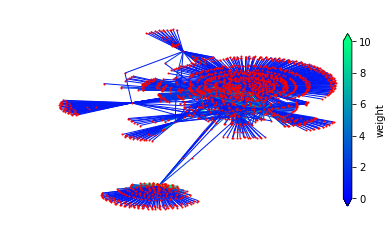

In [3]:
# we go through the users until we get more than 10000 mails in sent mails of them: _sent_mail, sent and sent_items 
# to avoid overlap of mails and then use networkx package to plot the relation network
# weight is represented by color as indicated in the plot

import matplotlib.pyplot as plt
import networkx as nx
import os
import re
import matplotlib as mpl
import matplotlib.cm as cm


maildir = '/Users/yuey/Documents/WPI/Case5/maildir'
edge = {}
count = 0
for root, dirs0, files in os.walk(maildir):
    break

for cursor in dirs0:
    if count > 10000:
        break
    current_dir_1 = maildir + os.sep + cursor + os.sep + '_sent_mail'   
    current_dir_2 = maildir + os.sep + cursor + os.sep + 'sent' 
    current_dir_3 = maildir + os.sep + cursor + os.sep + 'sent_items' 
    
    for root, dirs, files in os.walk(current_dir_1):
        for file in files:
            with open(current_dir_1 + os.sep + file, "r") as f:
                count += 1
                try:
                    mylist = f.read().splitlines()
                    str = ""

                    for line in mylist:
                        if line.startswith("Subject: "):
                            break
                        line = line.strip("\n")
                        str += line
                    index_1 = str.find("From: ")
                    index_2 = str.find("To: ")
                    from_name = str[(index_1 + 6):index_2].replace(" ", "").replace("\t", "")
                    to_name = re.split(r",", str[(index_2 + 4):len(str)].replace(" ", "").replace("\t", ""))

                    if from_name.endswith("enron.com"):
                        for new_to_name in to_name:
                            if new_to_name.endswith("enron.com"):
                                new_edge = (from_name, new_to_name)
                                if (new_edge in edge):
                                    edge[new_edge] += 1
                                else:
                                    edge[new_edge] = 1
                except UnicodeDecodeError:
                    pass

    for root, dirs, files in os.walk(current_dir_2):
        for file in files:
            with open(current_dir_2 + os.sep + file, "r") as f:
                count += 1
                try:
                    mylist = f.read().splitlines()
                    str = ""

                    for line in mylist:
                        if line.startswith("Subject: "):
                            break
                        line = line.strip("\n")
                        str += line
                    index_1 = str.find("From: ")
                    index_2 = str.find("To: ")
                    from_name = str[(index_1 + 6):index_2].replace(" ", "").replace("\t", "")
                    to_name = re.split(r",", str[(index_2 + 4):len(str)].replace(" ", "").replace("\t", ""))

                    if from_name.endswith("enron.com"):
                        for new_to_name in to_name:
                            if new_to_name.endswith("enron.com"):
                                new_edge = (from_name, new_to_name)
                                if (new_edge in edge):
                                    edge[new_edge] += 1
                                else:
                                    edge[new_edge] = 1
                except UnicodeDecodeError:
                    pass

    for root, dirs, files in os.walk(current_dir_3):
        for file in files:
            with open(current_dir_3 + os.sep + file, "r") as f:
                count += 1
                try:
                    mylist = f.read().splitlines()
                    str = ""

                    for line in mylist:
                        if line.startswith("Subject: "):
                            break
                        line = line.strip("\n")
                        str += line
                    index_1 = str.find("From: ")
                    index_2 = str.find("To: ")
                    from_name = str[(index_1 + 6):index_2].replace(" ", "").replace("\t", "")
                    to_name = re.split(r",", str[(index_2 + 4):len(str)].replace(" ", "").replace("\t", ""))

                    if from_name.endswith("enron.com"):
                        for new_to_name in to_name:
                            if new_to_name.endswith("enron.com"):
                                new_edge = (from_name, new_to_name)
                                if (new_edge in edge):
                                    edge[new_edge] += 1
                                else:
                                    edge[new_edge] = 1
                except UnicodeDecodeError:
                    pass

print(count)
print(len(edge))

G = nx.Graph()
cmap = mpl.cm.winter
norm = mpl.colors.Normalize(vmin=0, vmax=10)

for k, v in edge.items():
    G.add_edge(k[0],k[1],weight = v, color = cmap(norm(v)))

edges = G.edges()

colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

fig, ax = plt.subplots()

nx.draw(G, edges=edges, edge_color=colors, node_size=1)

cax = fig.add_axes([0.85, 0.2, 0.02, 0.6])
ax = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, spacing='proportional', extend='both')
ax.set_label('weight')

plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [ ]:
# In this case we are going to use sklearn pacakge to do email classification: ham (non-junk mail)and spam(junk mail)
# We go through all the mails of all users in folder "inbox" and "deleted_items", which is already classified by the users
# We use k-flod cross validation, using part of the dataset as training set and the rest as testing, and finally gain the accuracy

Write codes to implement the solution in python:

In [8]:

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(data['text'].values)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

# here's one example of classification test after the training
examples = ['Free Viagra call today!', "Tomorrow's meeting canceled."]
example_counts = count_vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], 
      dtype='<U4')

In [9]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('classifier',  MultinomialNB()) ])

pipeline.fit(data['text'].values, data['class'].values)
pipeline.predict(examples) # ['spam', 'ham']

k_fold = KFold(n=len(data), n_folds=6)
scores = []
confusion = np.array([[0, 0], [0, 0]])

HAM = 'ham'
SPAM = 'spam'
# here we use 6-fold cross validation to avoid bias
for train_indices, test_indices in k_fold:
    train_text = data.iloc[train_indices]['text'].values
    train_y = data.iloc[train_indices]['class'].values

    test_text = data.iloc[test_indices]['text'].values
    test_y = data.iloc[test_indices]['class'].values

    pipeline.fit(train_text, train_y)
    predictions = pipeline.predict(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label=SPAM)
    scores.append(score)

print('Total emails classified:', len(data))
print('Score:', np.average(scores))
print('Confusion matrix:')
print(confusion)
print("Accuracy:", int(confusion[1,1] + confusion[0,0])/np.sum(confusion))

Total emails classified: 95483
Score: 0.551185756035
Confusion matrix:
[[38868  5674]
 [29399 21542]]
Accuracy: 0.632678068347


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [ ]:
# Our testing results are printed in the previous cells. 

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 5".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) plot email communication graph/network (10 points):
       0: missing answer
       4: okay, but with major problems
       7: good, but with minor problems
      10: perfect
    

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


